Student Name: Neha Pawar
Student ID: W1286279

Task: To develop   a   dashboard   on   the    MSIS    program   at Santa   Clara   University   for   prospective   students   and   recruiters

One of the major reasons that Santa Clara University MSIS program is preferred over other university's MSIS program is that the university is in the heart of Silicon Valley. Below screenshot shows employement of Computer and Information System engineers, by State, by May 2016.
Reference: https://www.bls.gov/oes/current/oes113021.htm

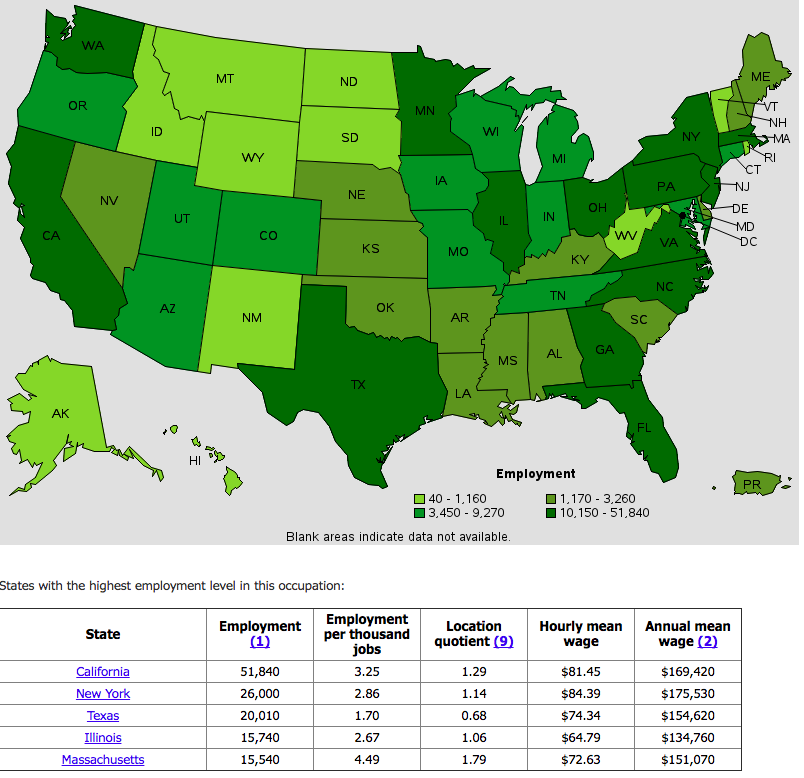

In [117]:
Image("Emp_data_by_state.png")

Prospective students and recruiters will first refer to Santa Clara University official website for the KPIs such as Average GRE, GMAT, undegraduate GPA, student diversity, alumni workplaces.
Reference: https://www.scu.edu/business/ms-information-systems/prospective-students/class-profile/

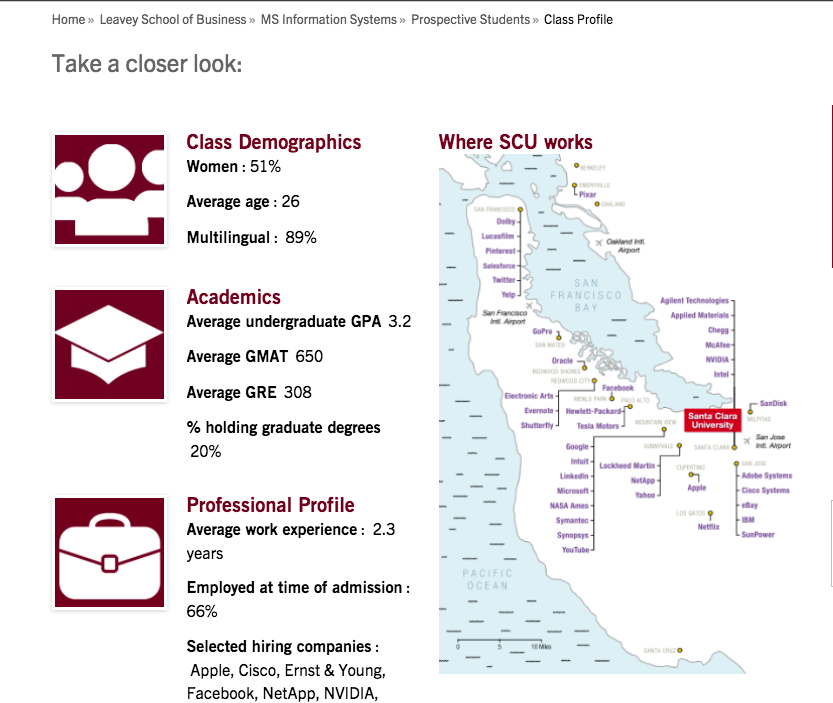

In [66]:
from IPython.display import Image
Image("scu_msis_data.png")

Imported data from http://study.com/articles/Top_Ranked_School_for_Information_Technology_-_San_Jose_CA.html to compare Santa Clara University, San Jose University and University of San Fransico with respect to Information Systems Program.

In [83]:
from bs4 import BeautifulSoup
import urllib2
import requests

In [93]:
data_compare = requests.get('http://study.com/articles/Top_Ranked_School_for_Information_Technology_-_San_Jose_CA.html')
data_compare

<Response [200]>

In [94]:
html_compare = BeautifulSoup(data_compare.content, 'html.parser')

In [40]:
#print(html_data.prettify())

In [95]:
table = html_compare.find('table')

In [96]:
table_compare = table.find('tbody')
#print(table_compare)

In [97]:
for row in table_compare.find_all('tr'):
    for cell in row.find_all('td'):
        print(cell)

<td> <b>Rankings (2013)</b> </td>
<td> Ranked 2nd among universities in the Western region* </td>
<td> Named the 9th best public school in the Western region* </td>
<td> 106th among national universities in the U.S.*</td>
<td> <b>Location</b> </td>
<td> Santa Clara, CA (about 2 miles from San Jose) </td>
<td> San Jose, CA </td>
<td> San Francisco, CA (roughly 42 miles from San Jose</td>
<td> <b>School Type</b> </td>
<td> 4-year, private not-for-profit </td>
<td> 4-year, public </td>
<td> 4-year, private not-for-profit</td>
<td> <b>Tuition &amp; Fees (2012-2013)</b> </td>
<td> $23,976 (graduate)** </td>
<td> $6,852, in-state; $18,510, out-of-state (undergrad)** </td>
<td> $965 per credit (bachelor's completion program)***; $20,390 per year (graduate)**</td>
<td> <b>Information Technology Degrees and Programs Offered</b> </td>
<td> Master's degree </td>
<td> Bachelor's degree </td>
<td> Adult bachelor's completion and master's degrees</td>
<td> <b>Information Technology Degrees Awarded (

In [99]:
data_compare = {
    'Category' : [],
    'Santa Clara University' : [],
    'San Jose State University' : [],
    'University of San Francisco' : []
}

table_names = ['Category','Santa Clara University','San Jose State University','University of San Francisco']
count = 0
for row in table_compare.find_all('tr'):
    for cell in row.find_all('td'):
        #print( table_names[count%4] +":"+ cell.get_text())
        data_compare[table_names[count%4]].append( cell.get_text() )
        count= count+1
    
import pandas as pd
datacompare = pd.DataFrame(data_compare)

In [100]:
datacompare.head(2)

,Category,San Jose State University,Santa Clara University,University of San Francisco
0,Rankings (2013),Named the 9th best public school in the Weste...,Ranked 2nd among universities in the Western ...,106th among national universities in the U.S.*
1,Location,"San Jose, CA","Santa Clara, CA (about 2 miles from San Jose)","San Francisco, CA (roughly 42 miles from San ..."


In [101]:
datacompare.to_csv('Dataset1.csv', index=False, encoding='utf-8')

Coverted table from https://www.payscale.com/research/US/Degree=Master_of_Information_Science_(MIS)/Salary to dataframe.

In [106]:
salary_data = pd.read_html('Paysalary.html')
salary_data

[                                                    0         1            2
 0                                                 Job   Average     Min  Max
 1                                                 NaN       NaN          NaN
 2                     Software Engineer  111 profiles   $86,916  $65K  $122K
 3                                                 NaN       NaN          NaN
 4                           Data Analyst  83 profiles   $63,839   $46K  $82K
 5                                                 NaN       NaN          NaN
 6                   Business Analyst, IT  69 profiles   $67,970     $51K$86K
 7                                                 NaN       NaN          NaN
 8                                                 NaN       NaN          NaN
 9                                                 NaN       NaN          NaN
 10     Information Technology (IT) Manager67 profiles  $100,541    $65K$131K
 11                                                NaN       NaN

In [108]:
salary_data = salary_data[0]
salary_data.columns = ['MSIS Job positions', 'Average Salary', 'Min  Max']

In [109]:
salary_data.head()

,MSIS Job positions,Average Salary,Min Max
0,Job,Average,Min Max
1,NaN,NaN,NaN
2,Software Engineer 111 profiles,"$86,916",$65K $122K
3,NaN,NaN,NaN
4,Data Analyst 83 profiles,"$63,839",$46K $82K


In [110]:
#Removing rows with null values
salary_data = salary_data.dropna(axis=0,how='any')

In [111]:
salary_data.drop(salary_data.index[:1], inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
salary_data.to_csv('salarydata.csv', index=False, encoding='utf-8')

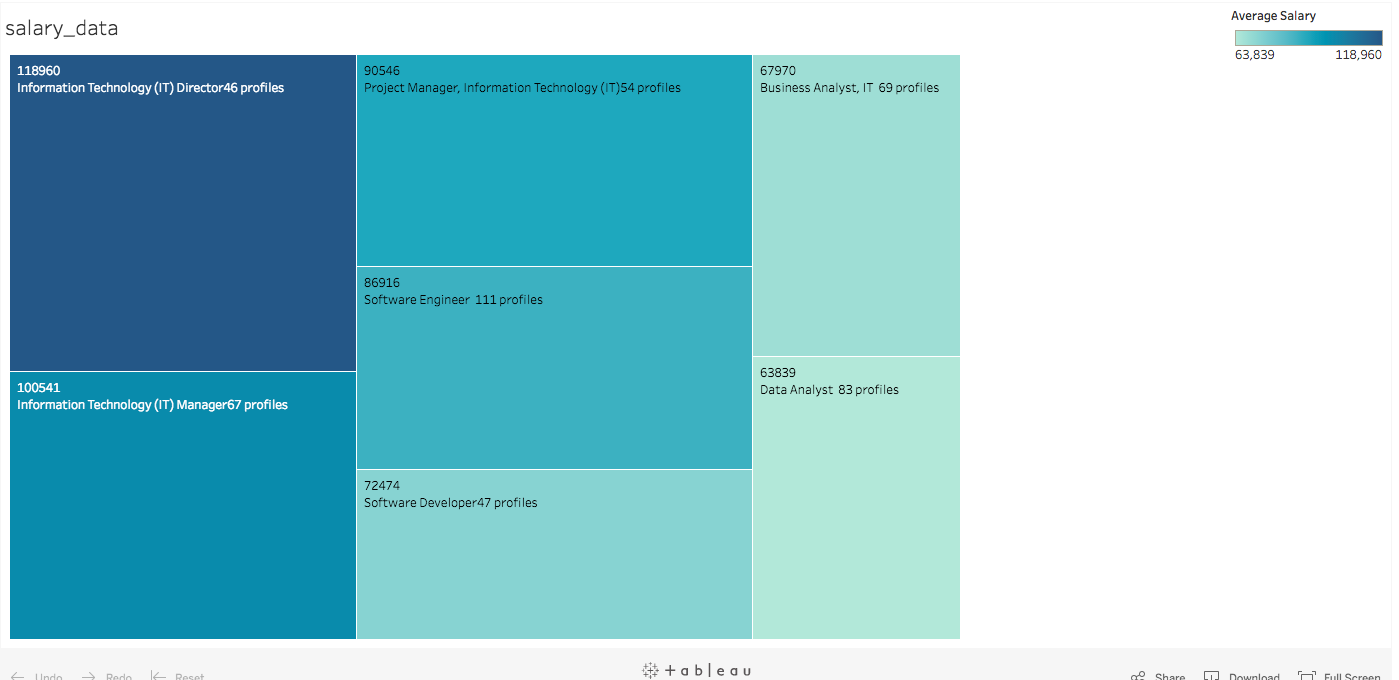

In [116]:
Image("salarydata.png")

Converted data from http://higheredublog.com/top-universities-for-ms-in-mis-in-usa/ to dataframe:

In [113]:
url = 'http://higheredublog.com/top-universities-for-ms-in-mis-in-usa/'

In [54]:
data = pd.read_html(url, header = 0)

In [55]:
data1 = data[0]
data1.head()

,Sr. No,University,Program
0,1,Carnegie Mellon University (Heinz),MISM
1,2,Indiana University – Bloomington (Kelley),MS IS
2,3,"University of California, Berkeley (iSchool)",MIMS
3,4,"University of Washington, Seattle (iSchool/Fos...",MS IM/MS IS
4,5,University of Arizona (Eller),MS MIS


In [56]:
data1.columns = ['RANKING', 'UNIVERSITY', 'PROGRAM']

In [57]:
data1.dtypes

RANKING        int64
UNIVERSITY    object
PROGRAM       object
dtype: object

In [58]:
data1.head()

,RANKING,UNIVERSITY,PROGRAM
0,1,Carnegie Mellon University (Heinz),MISM
1,2,Indiana University – Bloomington (Kelley),MS IS
2,3,"University of California, Berkeley (iSchool)",MIMS
3,4,"University of Washington, Seattle (iSchool/Fos...",MS IM/MS IS
4,5,University of Arizona (Eller),MS MIS


In [59]:
df = pd.DataFrame(data1)
df.head()

,RANKING,UNIVERSITY,PROGRAM
0,1,Carnegie Mellon University (Heinz),MISM
1,2,Indiana University – Bloomington (Kelley),MS IS
2,3,"University of California, Berkeley (iSchool)",MIMS
3,4,"University of Washington, Seattle (iSchool/Fos...",MS IM/MS IS
4,5,University of Arizona (Eller),MS MIS


In [60]:
df.to_csv('univ_ranking.csv', index=False, encoding='utf-8')

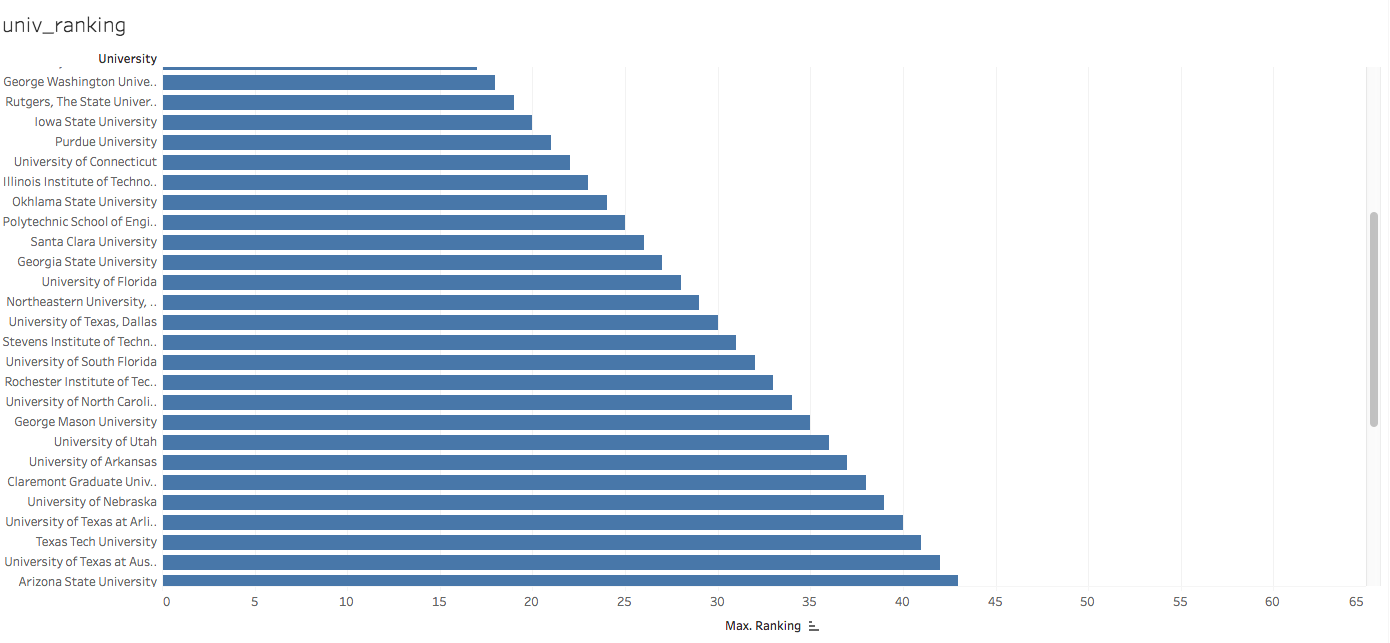

In [80]:
Image("univ_ranking.png")

For the next iteration, I would like to change measure from MAX ranking to highest ranking. I think this graph doesnt correctly depict its purpose because of referring ranking as a mathematical number.

Converted table from https://www.universities.com/find/california/best/management-information-systems-degrees to dataframe.

In [74]:
url2 = 'file:///Users/MyMac/Desktop/student_teacher.html'
student_teacher = pd.read_html(url2, header = 0)

In [75]:
student_teacher = student_teacher[0]
student_teacher.head()

,School Logo,School Name,Average tuition,Student Teacher Ratio,Enrolled Students
0,NaN,"Santa Clara University Santa Clara, CA",5/5,14 : 1,8680
1,NaN,"University of San Francisco San Francisco, CA",5/5,15 : 1,10797
2,NaN,"Loyola Marymount University Los Angeles, CA",5/5,13 : 1,9392
3,NaN,"California Lutheran University Thousand Oaks, CA",5/5,16 : 1,4126
4,NaN,"University of Redlands Redlands, CA",5/5,16 : 1,5215


In [76]:
stud_teach = pd.DataFrame(student_teacher)
stud_teach.head()

,School Logo,School Name,Average tuition,Student Teacher Ratio,Enrolled Students
0,NaN,"Santa Clara University Santa Clara, CA",5/5,14 : 1,8680
1,NaN,"University of San Francisco San Francisco, CA",5/5,15 : 1,10797
2,NaN,"Loyola Marymount University Los Angeles, CA",5/5,13 : 1,9392
3,NaN,"California Lutheran University Thousand Oaks, CA",5/5,16 : 1,4126
4,NaN,"University of Redlands Redlands, CA",5/5,16 : 1,5215


In [77]:
stud_teach.to_csv('stud_teach.csv', index=False, encoding='utf-8')

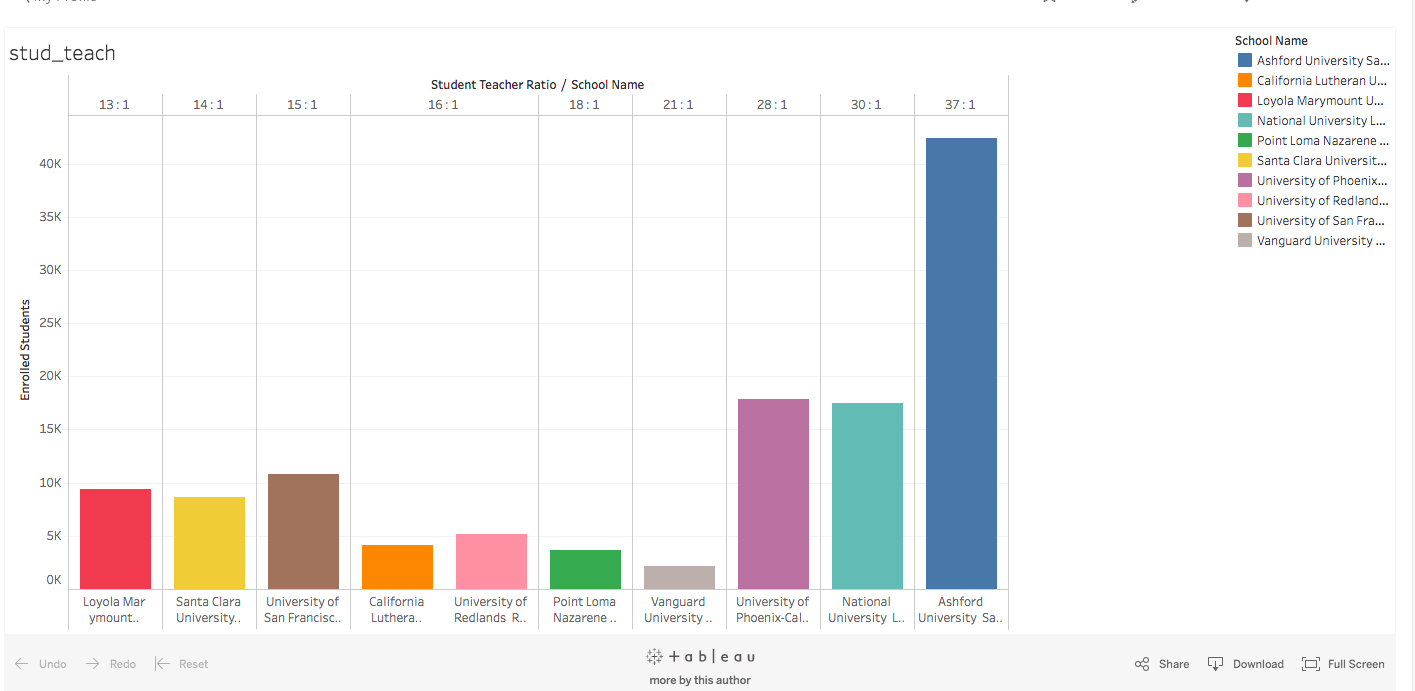

In [79]:
Image("stud_teach.png")